# Bayesian A/B Testing (Beta-Binomial)

The point of the exercise is to measure the uncertainty of two hidden parameters for a binomial distribution and place a probability that one parameter is larger than another given some randomly generated data from each parameter. This uses "grid estimation" to calculate the posterior distribution and joint probability distribution.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats

### Create the data
Randomly choose a parameter value for a binomial distribution and randomly make a second paramrter value which is close by. Then use those two paramters to generate some data from a Binomial distribution.

In [4]:
parameter_a = np.random.uniform(low=0, high=.80)
parameter_b = parameter_a + np.random.normal(0,.10,1)[0]

In [8]:
n = 50
experiment_a = stats.binom.rvs(n=n, p=parameter_a)
experiment_b = stats.binom.rvs(n=n, p=parameter_b)

### Calculate the posterior distribution for each experiment

In [23]:
alpha_prior = 1
beta_prior = 1

In [10]:
params = np.linspace(0,1,1001)

posterior_a = stats.beta.pdf(
    x = params, 
    a = experiment_a + alpha_prior, 
    b = n - experiment_a + beta_prior
)
posterior_a = pd.Series(posterior_a, index=params, name='exp_a')
posterior_a = posterior_a / posterior_a.sum()

posterior_b = stats.beta.pdf(
    x = params, 
    a = experiment_b + alpha_prior, 
    b = n - experiment_b + beta_prior
)
posterior_b = pd.Series(posterior_b, index=params, name='exp_b')
posterior_b = posterior_b / posterior_b.sum()

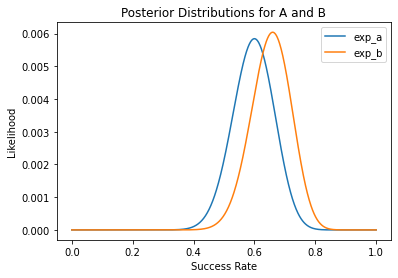

In [26]:
title = 'Posterior Distributions for A and B'
xlabel = 'Success Rate'
ylabel = 'Likelihood'
posterior_a.plot(legend=True, title=title, xlabel=xlabel, ylabel=ylabel)
posterior_b.plot(legend=True);

### Calculate the probability that parameter A > parameter B

In [12]:
a_expanded = pd.DataFrame( [list(posterior_a)] * n )
b_expanded = pd.DataFrame( [list(posterior_b)] * n )

In [13]:
joint_probability = a_expanded * b_expanded.T
joint_probability = joint_probability / joint_probability.sum().sum()

In [14]:
params_A, params_B = np.meshgrid(np.linspace(0,1,1001), np.linspace(0,1,1001))
a_gt_b_mask = np.zeros(shape=params_A.shape)
a_gt_b_mask[np.where(params_A > params_B)] = 1.0

In [27]:
p = (a_gt_b_mask * joint_probability).sum().sum()
print('Probability that A is better than B:', round(p, 4))

Probability that A is better than B: 0.32


### Now we can peek at the hidden parameters

In [22]:
print('parameter A:', parameter_a)
print('parameter B:', parameter_b)

parameter A: 0.5652565792031597
parameter B: 0.6437944411061326


In [21]:
print('experiment A:', experiment_a) 
print('experiment B:', experiment_b)

experiment A: 30
experiment B: 33
